# Death rates for suicide, by sex and age by year in the United States from 1950 to 2018 

Dataset publicised by U.S. Department of Health & Human Services
Dataset available at https://catalog.data.gov/dataset/death-rates-for-suicide-by-sex-race-hispanic-origin-and-age-united-states-020c1

Metadata Updated: April 28, 2022

Data on death rates for suicide, by selected population characteristics. Please refer to the PDF or Excel version of this table in the HUS 2019 Data Finder (https://www.cdc.gov/nchs/hus/contents2019.htm) for critical information about measures, definitions, and changes over time.

SOURCE: NCHS, National Vital Statistics System (NVSS); Grove RD, Hetzel AM. Vital statistics rates in the United States, 1940–1960. National Center for Health Statistics. 1968; numerator data from NVSS annual public-use Mortality Files; denominator data from U.S. Census Bureau national population estimates; and Murphy SL, Xu JQ, Kochanek KD, Arias E, Tejada-Vera B. Deaths: Final data for 2018. National Vital Statistics Reports; vol 69 no 13. Hyattsville, MD: National Center for Health Statistics. 2021. Available from: https://www.cdc.gov/nchs/products/nvsr.htm. For more information on the National Vital Statistics System, see the corresponding Appendix entry at https://www.cdc.gov/nchs/data/hus/hus19-appendix-508.pdf.


I reviewed the available data and I will be using the crude data from aggragate years for all persons, male and female all ages.

There is more data available in the dataset but it is incomplete and no way to retrieve the missing data. Therefore, I'm focusing on the complete data and what trends I can find within.

In [126]:
# Import packages

# For data visualization
%matplotlib inline
import matplotlib.pyplot as plt


# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)



In [127]:
df0 = pd.read_csv("Deathdata.csv")


In [128]:
df1= df0[df0['UNIT_NUM'] == 2]

In [129]:
df2 = df1[df1['STUB_NAME_NUM'].isin([0, 1, 2, 3])]

In [130]:
columns_to_keep = ['STUB_NAME', 'STUB_LABEL', 'YEAR', 'AGE', 'ESTIMATE']
data = df2[columns_to_keep]

In [131]:
data.head()

,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE
698,Total,All persons,1980,All ages,11.9
728,Total,All persons,1981,All ages,12.0
814,Total,All persons,1950,All ages,11.4
815,Total,All persons,1960,All ages,10.6
816,Total,All persons,1970,All ages,11.6


At this point the data is filtered to the desired dataset.

In [132]:
data.describe()

,YEAR,ESTIMATE
count,1890.000000,1888.000000
mean,1996.214286,15.193167
std,14.945963,11.398886
min,1950.000000,0.300000
25%,1987.000000,6.000000
50%,1997.500000,14.150000
75%,2008.000000,21.300000
max,2018.000000,69.500000


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 698 to 2701
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STUB_NAME   1890 non-null   object 
 1   STUB_LABEL  1890 non-null   object 
 2   YEAR        1890 non-null   int64  
 3   AGE         1890 non-null   object 
 4   ESTIMATE    1888 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 88.6+ KB


In [134]:
data.columns

Index(['STUB_NAME', 'STUB_LABEL', 'YEAR', 'AGE', 'ESTIMATE'], dtype='object')

In [135]:
data[data.duplicated()].head()

,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE


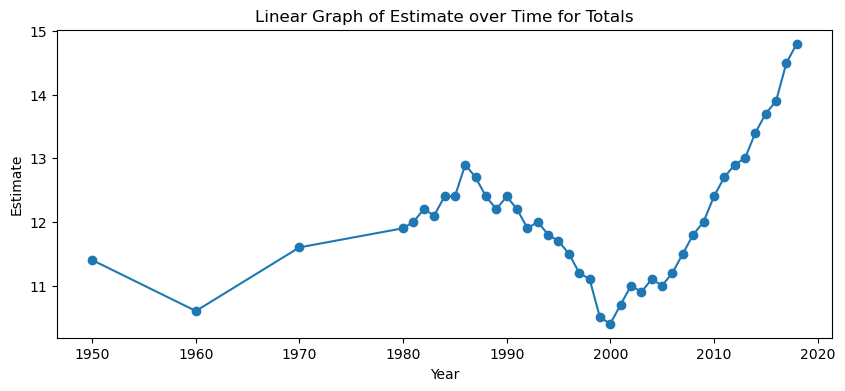

In [136]:
# Filter the dataset by STUB_NAME = Total
filtered_dataset = data[data['STUB_NAME'] == 'Total']

# Sort the dataset by the "Year" column to put the years in order
filtered_dataset = filtered_dataset.sort_values('YEAR')

x = filtered_dataset['YEAR']
y = filtered_dataset['ESTIMATE']
plt.figure(figsize=(10, 4))  
plt.plot(x, y, marker='o')

plt.xlabel('Year')
plt.ylabel('Estimate')
plt.title('Linear Graph of Estimate over Time for Totals')

plt.show()

This graph shows an overall sharp dip heading up to 2000 and then a sharp rise over the next 18 years to 2018. It would be worth researching the year 2000 to see what caused the spike heading into 2020

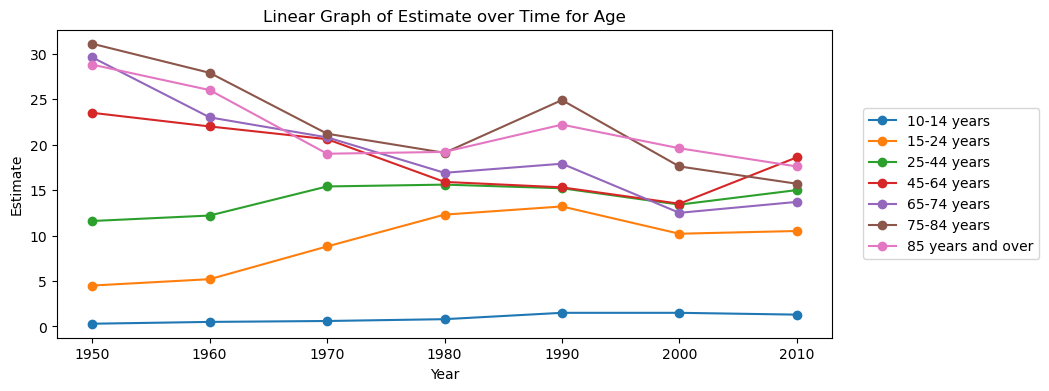

In [137]:
# Filter the dataset by STUB_NAME = Age

filtered_dataset = data[data['STUB_NAME'] == 'Age']

# Define the YEAR values for just the decade years
desired_years = [1950,1960,1970,1980,1990,2000,2010,2020] 

desired_stub_labels = ['10-14 years','15-24 years', '25-44 years', '45-64 years', '65-74 years', '75-84 years', '85 years and over' ] 

# Filter the dataset by the YEAR values and stub label values for just the decade years
filtered_dataset = filtered_dataset[filtered_dataset['YEAR'].isin(desired_years)]
filtered_dataset = filtered_dataset[filtered_dataset['STUB_LABEL'].isin(desired_stub_labels)]

# Sort the dataset by the "Year" column to put the years in order
filtered_dataset = filtered_dataset.sort_values('YEAR')
grouped_data = filtered_dataset.groupby('STUB_LABEL')

plt.figure(figsize=(10, 4))  

# Create a separate line for each STUB_LABEL value
for name, group in grouped_data:
    plt.plot(group['YEAR'], group['ESTIMATE'], marker='o', label=name)

plt.xlabel('Year')
plt.ylabel('Estimate')
plt.title('Linear Graph of Estimate over Time for Age')

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

From what I can speculate, the older generations are showing a decrease in suicide rates while the younger generations are showing an increase in suicide rates. There is not sufficient data in this dataset alone to determine the cause but it gives the reader a starting place on where to research next.

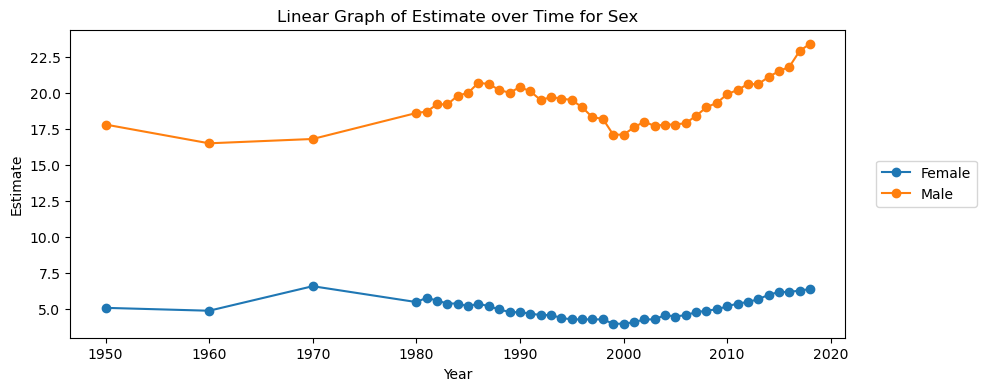

In [138]:
# Filter the dataset by male and female

filtered_dataset = data[data['STUB_NAME'] == 'Sex']

# Sort the dataset by the "Year" column to put the years in order
filtered_dataset = filtered_dataset.sort_values('YEAR')

grouped_data = filtered_dataset.groupby('STUB_LABEL')

plt.figure(figsize=(10, 4))  

# Create a separate line for each STUB_LABEL value
for name, group in grouped_data:
    plt.plot(group['YEAR'], group['ESTIMATE'], marker='o', label=name)

plt.xlabel('Year')
plt.ylabel('Estimate')
plt.title('Linear Graph of Estimate over Time for Sex')

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

From the male vs female comparison we can draw the conclusion that Females have less fluctuation in the suicide rate in this timeline while the Males have a larger fluctuation that may be influencing the Age average graph. It would be worth looking at age per sex by age per year to see if theres a substantial difference to the overall average.

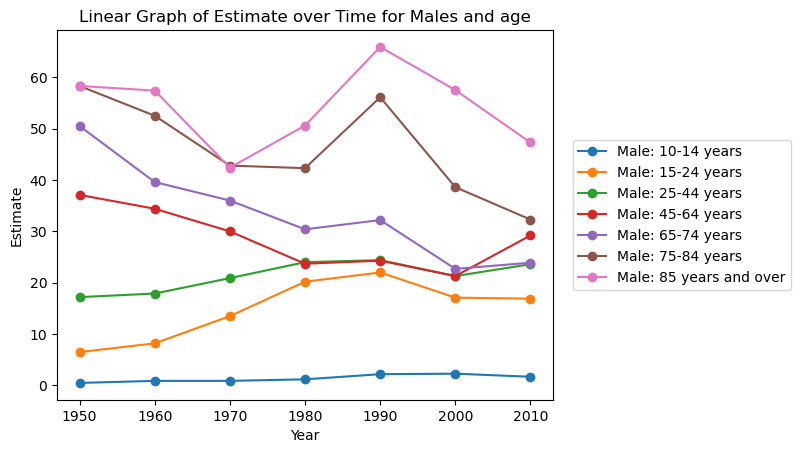

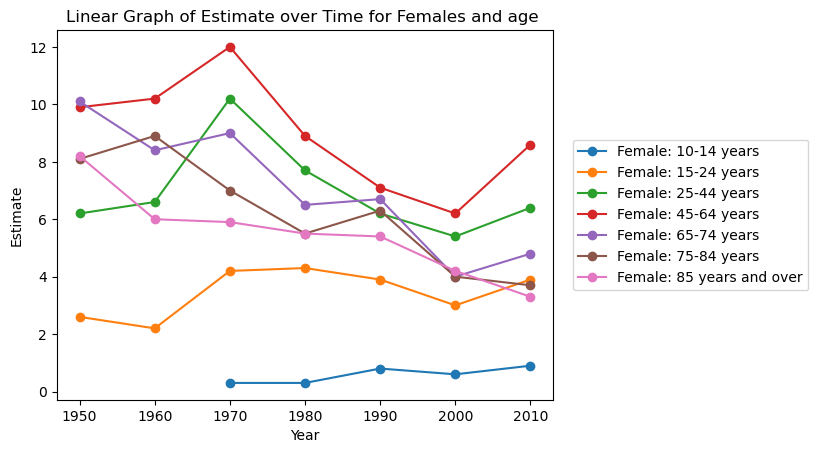

In [139]:
# Filter the dataset by Sex and age
filtered_dataset = data[data['STUB_NAME'] == 'Sex and age']

# Sort the dataset by the "Year" column to put the years in order
filtered_dataset = filtered_dataset.sort_values('YEAR')


# Define the specific YEAR values for just the decade years
desired_years = [1950,1960,1970,1980,1990,2000,2010,2020] 

#Define the stub_labels for the ages so there's no overlap
desired_stub_labels_1 = ['Male: 10-14 years', 'Male: 15-24 years', 'Male: 25-44 years', 'Male: 45-64 years', 'Male: 65-74 years', 'Male: 75-84 years', 'Male: 85 years and over'] 
desired_stub_labels_2 = ['Female: 10-14 years', 'Female: 15-24 years', 'Female: 25-44 years', 'Female: 45-64 years', 'Female: 65-74 years', 'Female: 75-84 years', 'Female: 85 years and over'] 

# Creating 2 different datasets for 2 graphs because there so many line groupings already
filtered_dataset_1 = filtered_dataset[filtered_dataset['YEAR'].isin(desired_years)]
filtered_dataset_1 = filtered_dataset_1[filtered_dataset_1['STUB_LABEL'].isin(desired_stub_labels_1)]

filtered_dataset_2 = filtered_dataset[filtered_dataset['YEAR'].isin(desired_years)]
filtered_dataset_2 = filtered_dataset_2[filtered_dataset_2['STUB_LABEL'].isin(desired_stub_labels_2)]

grouped_data_1 = filtered_dataset_1.groupby('STUB_LABEL')
grouped_data_2 = filtered_dataset_2.groupby('STUB_LABEL')


# Create the first graph

for name, group in grouped_data_1:
    plt.plot(group['YEAR'], group['ESTIMATE'], marker='o', label=name)

plt.xlabel('Year')
plt.ylabel('Estimate')
plt.title('Linear Graph of Estimate over Time for Males and age')

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()


# Create the second graph

for name, group in grouped_data_2:
    plt.plot(group['YEAR'], group['ESTIMATE'], marker='o', label=name)

plt.xlabel('Year')
plt.ylabel('Estimate')
plt.title('Linear Graph of Estimate over Time for Females and age ')

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()


From these graphs we can also see that Females had a lower rate of suicide during this time period, but had just as much fluctuation as the Males did. The Females fluctuation converged downward overall whereas the Male fluctuation converged in the middle.

In summary, these graphs provide evidence of converging suicide rates over time. There is a need to investigate the spike in the year 2000, as both sexes dropped to their lowest in 2000 but females, and males at a slower rate, shot upward afterward.Conducting further research and analysis can help uncover underlying factors contributing to these trends and patterns in suicide rates. If I were to research this further, I would investigate how socioeconomic living conditions changed from 1970 to 2000 and then changed again after 2000.